In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_cm_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        49.4587 (44.8987, 55.3196) (44.5919, 54.7986) 10.2067 (Jnode 202)\n',
 't_n104        31.6582 (28.6215, 33.9770) (28.6967, 34.0357)  5.3390 (Jnode 201)\n',
 't_n105        30.5891 (27.6456, 32.8456) (27.7324, 32.9228)  5.1904 (Jnode 200)\n',
 't_n106        27.7098 (25.0110, 29.8937) (25.1059, 29.9772)  4.8713 (Jnode 199)\n',
 't_n107        26.9433 (24.3212, 29.0998) (24.4158, 29.1831)  4.7673 (Jnode 198)\n',
 't_n108        25.4897 (22.9881, 27.6401) (23.0866, 27.7269)  4.6402 (Jnode 197)\n',
 't_n109        12.3686 (11.2208, 14.0967) (11.1055, 13.9320)  2.8265 (Jnode 196)\n',
 't_n110        12.2584 (11.1250, 13.9748) (11.0198, 13.8191)  2.7993 (Jnode 195)\n',
 't_n111        11.8941 (10.8037, 13.5587) (10.6951, 13.3995)  2.7044 (Jnode 194)\n',
 't_n112        11.4138 (10.3778, 13.0129) (10.2727, 12.8586)  2.5859 (Jnode 193)\n',
 't_n113        10.8387 ( 9.8739, 12.3509) ( 9.7492, 12.1757)  2.4266 (Jnode 192)\n',
 't_n114         7.2129 ( 6.4268,  8.3057) ( 6.3473,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[49.4587,
 31.6582,
 30.5891,
 27.7098,
 26.9433,
 25.4897,
 12.3686,
 12.2584,
 11.8941,
 11.4138,
 10.8387,
 7.2129,
 4.342,
 2.5501,
 1.9413,
 8.2328,
 6.9968,
 11.3864,
 7.1506,
 10.915,
 8.7196,
 7.0904,
 5.8883,
 10.5992,
 9.9739,
 2.643,
 11.7642,
 10.6105,
 8.2207,
 6.5781,
 7.2379,
 6.5929,
 5.5021,
 5.3897,
 23.7813,
 19.2748,
 25.7297,
 23.7382,
 22.2732,
 18.4986,
 9.9599,
 17.8183,
 15.6786,
 13.9405,
 11.7992,
 21.5518,
 19.9681,
 5.1598,
 2.2714,
 28.8085,
 27.0117,
 24.4131,
 23.7257,
 25.8059,
 17.9676,
 21.6543,
 17.4945,
 30.9136,
 29.2544,
 26.7428,
 25.2498,
 21.5763,
 14.4235,
 19.1839,
 26.2511,
 8.4472,
 26.4316,
 35.9964,
 35.1123,
 34.3034,
 32.8278,
 30.3335,
 28.9584,
 27.953,
 26.7674,
 23.943,
 20.8065,
 17.6218,
 24.255,
 22.8082,
 18.2222,
 20.638,
 26.1635,
 24.0958,
 22.2543,
 19.244,
 12.9755,
 24.6618,
 22.1524,
 19.5722,
 28.8514,
 27.343,
 25.94,
 23.0842,
 17.1076,
 25.8881,
 17.6914,
 14.2181,
 5.572,
 34.7994,
 30.1259]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cm_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[49.0211,
 31.8307,
 30.2038,
 27.1835,
 26.1592,
 23.9185,
 12.8035,
 12.6224,
 11.954,
 11.2663,
 10.5596,
 7.0599,
 4.3383,
 2.5679,
 2.1098,
 8.0241,
 6.5728,
 11.258,
 6.9977,
 10.6385,
 8.3452,
 6.6279,
 6.0909,
 10.5602,
 9.7485,
 3.1839,
 11.8808,
 10.5204,
 8.1332,
 6.4409,
 7.2932,
 6.4081,
 5.1779,
 5.8655,
 22.0861,
 18.1872,
 24.628,
 22.2969,
 20.2925,
 16.7365,
 9.5731,
 16.5344,
 14.0682,
 12.1552,
 10.0396,
 20.2137,
 18.2887,
 5.7941,
 2.7009,
 27.2853,
 24.8737,
 21.6035,
 21.1727,
 23.6321,
 16.0303,
 19.475,
 14.8653,
 30.6757,
 28.4865,
 25.4192,
 23.3829,
 19.9235,
 14.147,
 17.1848,
 24.8411,
 9.8978,
 25.1842,
 38.5636,
 36.6879,
 34.9799,
 32.8519,
 29.663,
 27.8418,
 26.2356,
 24.2581,
 20.9313,
 17.6238,
 14.5305,
 21.4603,
 19.8218,
 15.5329,
 16.942,
 24.1631,
 21.6784,
 19.3516,
 16.3308,
 11.4153,
 21.9485,
 19.4073,
 16.6048,
 27.2398,
 24.9567,
 22.6203,
 19.2594,
 13.32,
 23.3913,
 17.2859,
 13.3701,
 5.5288,
 37.1413,
 31.6772]

In [12]:
posterior_mean_iqtree

[49.4587,
 31.6582,
 30.5891,
 27.7098,
 26.9433,
 25.4897,
 12.3686,
 12.2584,
 11.8941,
 11.4138,
 10.8387,
 7.2129,
 4.342,
 2.5501,
 1.9413,
 8.2328,
 6.9968,
 11.3864,
 7.1506,
 10.915,
 8.7196,
 7.0904,
 5.8883,
 10.5992,
 9.9739,
 2.643,
 11.7642,
 10.6105,
 8.2207,
 6.5781,
 7.2379,
 6.5929,
 5.5021,
 5.3897,
 23.7813,
 19.2748,
 25.7297,
 23.7382,
 22.2732,
 18.4986,
 9.9599,
 17.8183,
 15.6786,
 13.9405,
 11.7992,
 21.5518,
 19.9681,
 5.1598,
 2.2714,
 28.8085,
 27.0117,
 24.4131,
 23.7257,
 25.8059,
 17.9676,
 21.6543,
 17.4945,
 30.9136,
 29.2544,
 26.7428,
 25.2498,
 21.5763,
 14.4235,
 19.1839,
 26.2511,
 8.4472,
 26.4316,
 35.9964,
 35.1123,
 34.3034,
 32.8278,
 30.3335,
 28.9584,
 27.953,
 26.7674,
 23.943,
 20.8065,
 17.6218,
 24.255,
 22.8082,
 18.2222,
 20.638,
 26.1635,
 24.0958,
 22.2543,
 19.244,
 12.9755,
 24.6618,
 22.1524,
 19.5722,
 28.8514,
 27.343,
 25.94,
 23.0842,
 17.1076,
 25.8881,
 17.6914,
 14.2181,
 5.572,
 34.7994,
 30.1259]

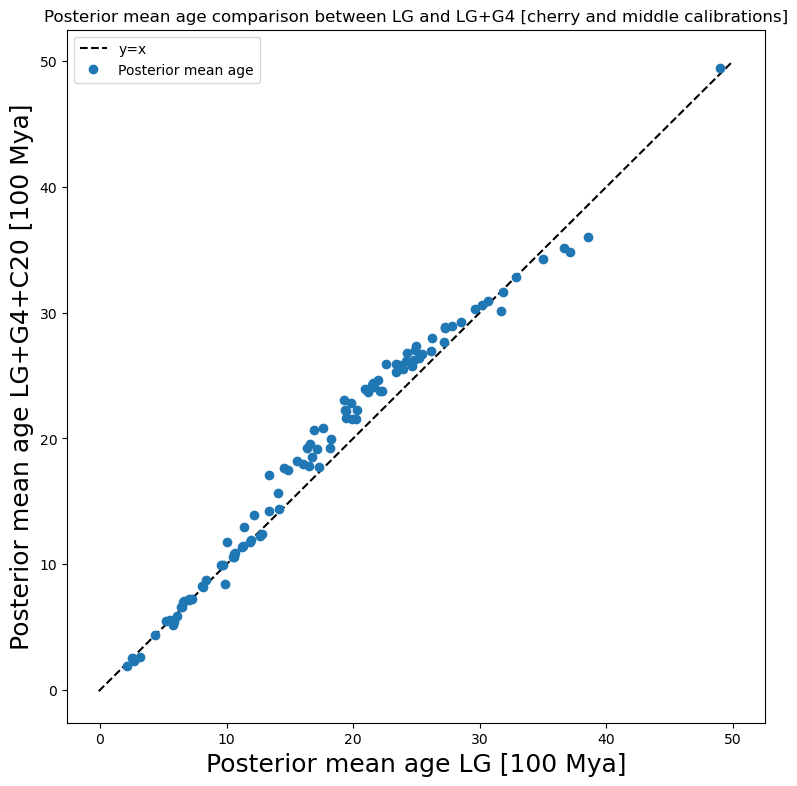

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_cm_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')